## Information on **Norm of noise before and after diffusion** :

To better understand the diffusion process, we wanted to see if the diffusion denoising process was really denoising the trajectory. 

In this experiment, we plot the distribution of the norm of the noise, evaluated on all test scenes. Turns out that the denoising step is efficient in the majority of the scenes.

### Code : 

To generate those data, the files *bounded_regression\bound_predictor.py* and *bounded_regression\bound_model.py* were used. To run the code, a bash script named *run_bounds_smoothing.bat* can be launched (on Windows). In this file the flag --function must be "diffusion". Moreover, one must active do_noise l.137 to generate the plots. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("noise.txt", sep="\t")

In [3]:
df

,scene_id,sigma,r,noise_before,noise_after
0,0,0.15,0.01,0.353343,0.235420
1,0,0.15,0.01,0.373698,0.363695
2,0,0.15,0.01,0.341938,0.196282
3,1,0.15,0.01,0.348909,0.249301
4,1,0.15,0.01,0.387117,0.210903
...,...,...,...,...,...
3141,1761,0.15,0.01,0.337054,0.201432
3142,1762,0.15,0.01,0.353967,0.209737
3143,1763,0.15,0.01,0.357538,0.202638
3144,1764,0.15,0.01,0.352993,0.254435


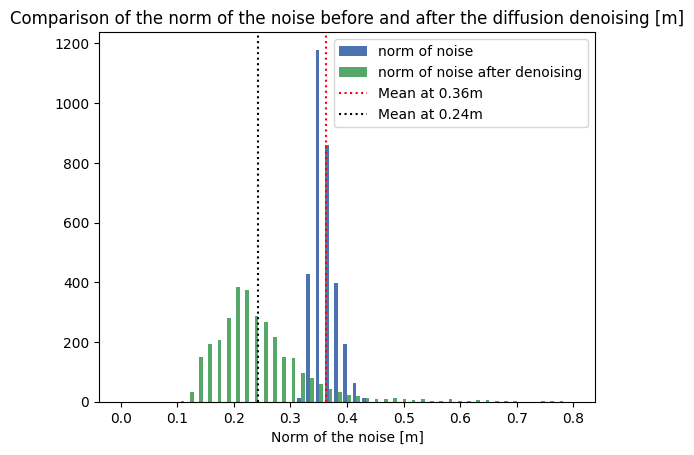

In [24]:

plt.style.use('seaborn-deep')

x = df["noise_before"]
y = df["noise_after"]

#plt.axhline(y=0.5, color="black", linestyle=":")
bins = np.linspace(0, 0.8, 50)

plt.hist([x, y], bins, label=['norm of noise', 'norm of noise after denoising'])
plt.axvline(x=df["noise_before"].mean(), color="r", linestyle=":", label = f"Mean at {df['noise_before'].mean():.2f}m")
plt.axvline(x=df["noise_after"].mean(), color="k", linestyle=":", label = f"Mean at {df['noise_after'].mean():.2f}m")
plt.legend(loc='upper right')
plt.title("Comparison of the norm of the noise before and after the diffusion denoising [m]")
plt.xlabel("Norm of the noise [m]")
plt.show()

we see that there is a good denoising.